In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [3]:
full_data = pd.read_csv('F:/Muthu_2023/Personal/NextStep/MLProjects/Analytics/Datasets/BigBasket/BB_Categorised.csv')

In [4]:
df = full_data[['Order', 'Description', 'Category', 'Sub Category', 'Created On']]
df = df[df['Category'] != 'Vegetables and Fruits']
df.rename(columns={'Order': 'Sale_code', 'Description': 'product_code', 'Created On': 'Order Date'}, inplace=True)
df.head()

Sale_code  product_code                Category Sub Category  Order Date
0    6468572  Other Sauces  Oil, Masala and Sauces       Sauces  22-09-2014
1    6468572       Cashews                    Food         Nuts  22-09-2014
2    6468572    Other Dals    Rice, Dhal and Flour         Dhal  22-09-2014
3    6468572       Namkeen     Snacks and Biscuits       Snacks  22-09-2014
4    6468572         Sugar  Oil, Masala and Sauces       Masala  22-09-2014

In [5]:
prod_combined = df[['Sale_code', 'product_code']].groupby(by='Sale_code')['product_code'].apply(list).reset_index()

te = TransactionEncoder()
te_arr = te.fit(prod_combined['product_code']).transform(prod_combined['product_code'])
onehot_en = pd.DataFrame(te_arr, columns=te.columns_)

In [6]:
freq_items = fpgrowth(onehot_en, min_support=0.01, max_len=5, use_colnames = True)

In [7]:
# freq_items = apriori(onehot_en, min_support=0.001, max_len=2, use_colnames = True)
# freq_items

In [8]:
pd.set_option('display.max_rows', 700)
# freq_items.sort_values(by='support', ascending=False)

In [9]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.01)

In [10]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         2442 non-null   object 
 1   consequents         2442 non-null   object 
 2   antecedent support  2442 non-null   float64
 3   consequent support  2442 non-null   float64
 4   support             2442 non-null   float64
 5   confidence          2442 non-null   float64
 6   lift                2442 non-null   float64
 7   leverage            2442 non-null   float64
 8   conviction          2442 non-null   float64
 9   zhangs_metric       2442 non-null   float64
dtypes: float64(8), object(2)
memory usage: 190.9+ KB


# Add Category to rules

In [15]:
pdt = pd.read_csv('F:/Muthu_2023/Personal/NextStep/MLProjects/Analytics/Datasets/BigBasket/ProductTable.csv')

KeyError: 'Category'

In [32]:
dt = dict(zip(pdt['Description'], pdt['Category']))

In [33]:
newdt = {ind: val for ind, val in dt.items() if val != 'Vegetables and Fruits'}
dt = newdt

In [40]:
rules['antcat'] = np.nan
rules['concat'] = np.nan
rules['antcnt'] = np.nan
rules['concnt'] = np.nan


for i in range(len(rules)):
    t = list(rules['antecedents'].iloc[i])
    rules['antcnt'].iloc[i] = len(t)
    if len(t) == 1:
        rules['antcat'].iloc[i] = dt[str(t[0])]
    else:
        Temp = []
        for j in range(len(t)):
            Temp.append(dt[str(t[j])])
        rules['antcat'].iloc[i] = Temp
    t = list(rules['consequents'].iloc[i])
    rules['concnt'].iloc[i] = len(t)
    if len(t) == 1:
        rules['concat'].iloc[i] = dt[str(t[0])]
    else:
        Temp = []
        for j in range(len(t)):
            Temp.append(dt[str(t[j])])
        rules['concat'].iloc[i] = Temp

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcat'].iloc[i] = dt[str(t[0])]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = le

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antcnt'].iloc[i] = len(t)
C:\

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9696\2194974756.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['concnt'].iloc[i] = len(t)


In [45]:
rule3 = rules[(rules['concnt'] > 3) & (rules['lift'] > 1)]

antecedents                                        consequents  \
1157     (Moong Dal)  (Whole Spices, Other Dals, Toor Dal, Sooji & R...   
1158    (Other Dals)  (Whole Spices, Toor Dal, Moong Dal, Sooji & Rava)   
1159      (Toor Dal)  (Whole Spices, Other Dals, Sooji & Rava, Moong...   
1160  (Whole Spices)    (Other Dals, Toor Dal, Moong Dal, Sooji & Rava)   
1161  (Sooji & Rava)    (Whole Spices, Other Dals, Toor Dal, Moong Dal)   
1745     (Moong Dal)     (Whole Spices, Other Dals, Toor Dal, Urad Dal)   
1746    (Other Dals)      (Whole Spices, Toor Dal, Moong Dal, Urad Dal)   
1747      (Toor Dal)    (Whole Spices, Other Dals, Moong Dal, Urad Dal)   
1748      (Urad Dal)    (Whole Spices, Other Dals, Toor Dal, Moong Dal)   
1749  (Whole Spices)        (Other Dals, Toor Dal, Moong Dal, Urad Dal)   
2097     (Moong Dal)        (Whole Spices, Other Dals, Sugar, Toor Dal)   
2098    (Other Dals)         (Whole Spices, Sugar, Toor Dal, Moong Dal)   
2099      (Toor Dal)       (Whole Spices, Other Dals, Sugar, Moong Dal)   
2100  (Whole Spices)           (Other Dals, Sugar, Toor Dal, Moong Dal)   
2101         (Sugar)    (Whole Spices, Other Dals, Toor Dal, Moong Dal)   

      antecedent support  consequent support   support  confidence      lift  \
1157            0.150519            0.016103  0.010780    0.071618  4.447421   
1158            0.259782            0.013575  0.010780    0.041496  3.056865   
1159            0.169949            0.016503  0.010780    0.063430  3.843648   
1160            0.227442            0.015704  0.010780    0.047396  3.018090   
1161            0.147591            0.021027  0.010780    0.073039  3.473502   
1745            0.150519            0.018765  0.012510    0.083112  4.429119   
1746            0.259782            0.015172  0.012510    0.048156  3.174055   
1747            0.169949            0.016902  0.012510    0.073610  4.355163   
1748            0.114586            0.021027  0.012510    0.109175  5.192049   
1749            0.227442            0.020229  0.012510    0.055003  2.719026   
2097            0.150519            0.015837  0.010381    0.068966  4.354680   
2098            0.259782            0.013042  0.010381    0.039959  3.063796   
2099            0.169949            0.016503  0.010381    0.061081  3.701291   
2100            0.227442            0.015571  0.010381    0.045641  2.931149   
2101            0.177935            0.021027  0.010381    0.058340  2.774453   

      leverage  conviction  zhangs_metric                  antcat  \
1157  0.008356    1.059797       0.912499    Rice, Dhal and Flour   
1158  0.007253    1.029130       0.909012    Rice, Dhal and Flour   
1159  0.007975    1.050106       0.891308    Rice, Dhal and Flour   
1160  0.007208    1.033269       0.865520  Oil, Masala and Sauces   
1161  0.007676    1.056110       0.835404    Rice, Dhal and Flour   
1745  0.009685    1.070180       0.911405    Rice, Dhal and Flour   
1746  0.008569    1.034653       0.925329    Rice, Dhal and Flour   
1747  0.009638    1.061214       0.928121    Rice, Dhal and Flour   
1748  0.010101    1.098951       0.911887    Rice, Dhal and Flour   
1749  0.007909    1.036798       0.818348  Oil, Masala and Sauces   
2097  0.007997    1.057064       0.906862    Rice, Dhal and Flour   
2098  0.006992    1.028037       0.910012    Rice, Dhal and Flour   
2099  0.007576    1.047478       0.879252    Rice, Dhal and Flour   
2100  0.006839    1.031508       0.852799  Oil, Masala and Sauces   
2101  0.006639    1.039624       0.778002  Oil, Masala and Sauces   

                                                 concat  antcnt  concnt  
1157  [Oil, Masala and Sauces, Rice, Dhal and Flour,...     1.0     4.0  
1158  [Oil, Masala and Sauces, Rice, Dhal and Flour,...     1.0     4.0  
1159  [Oil, Masala and Sauces, Rice, Dhal and Flour,...     1.0     4.0  
1160  [Rice, Dhal and Flour, Rice, Dhal and Flour, R...     1.0     4.0  
1161  [Oil, Masala and Sauces, Rice, Dhal and Flour,

In [79]:
rule1 = rules[(rules['antcat'] != rules['concat']) & (rules['confidence'] > 0.2) & (rules['lift'] > 1.01) & (rules['antcat'] != 'Vegetables and Fruits') & (rules['concat'] != 'Vegetables and Fruits')].sort_values(by='confidence', ascending = False)

<Figure size 1600x600 with 0 Axes>

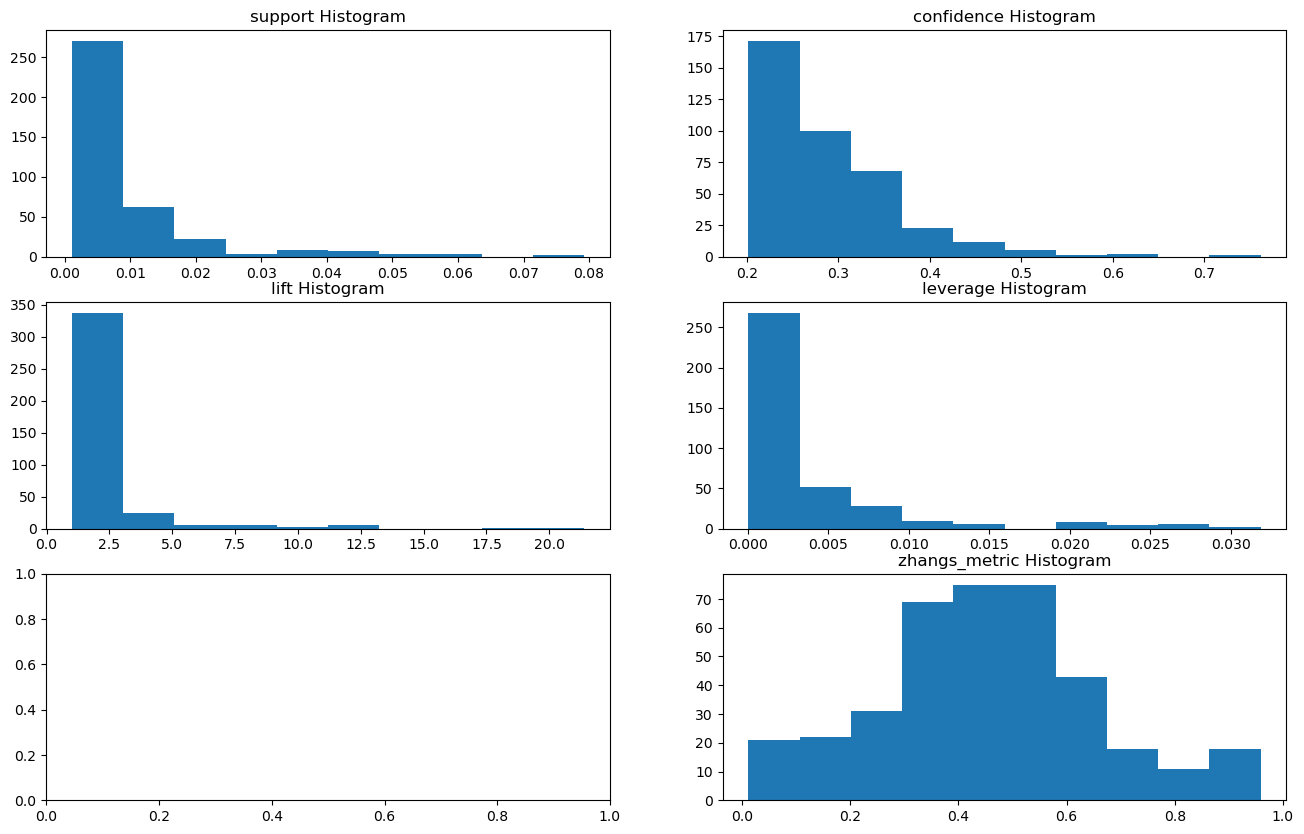

In [80]:
histogram_plot(rule1,10)

In [83]:
rule1.to_csv('rule1.csv')

In [85]:
rule2 = rules[(rules['antcat'] == rules['concat']) & (rules['confidence'] > 0.2) & (rules['lift'] > 1.01) & (rules['antcat'] != 'Vegetables and Fruits') & (rules['concat'] != 'Vegetables and Fruits')].sort_values(by='confidence', ascending = False)
rule2.to_csv('rule2.csv')

In [69]:
rules[(rules['antcat'] == rules['concat']) & (rules['confidence'] > 0.1) & (rules['lift'] > 1)]

antecedents consequents  antecedent support  consequent support  \
57            (Almonds)     (Bread)            0.062001            0.120067   
60            (Cashews)   (Almonds)            0.062120            0.062001   
61            (Almonds)   (Cashews)            0.062001            0.062120   
63    (Chinese Noodles)   (Almonds)            0.008585            0.062001   
110              (Oats)   (Almonds)            0.009181            0.062001   
...                 ...         ...                 ...                 ...   
4808         (Toor Dal)  (Urad Dal)            0.152259            0.102659   
4809         (Urad Dal)  (Toor Dal)            0.102659            0.152259   
4813       (Vermicelli)  (Toor Dal)            0.011923            0.152259   
4822       (Vermicelli)  (Urad Dal)            0.011923            0.102659   
4825     (Whole Grains)  (Urad Dal)            0.006915            0.102659   

       support  confidence      lift  leverage  conviction  zhangs_metric  \
57    0.009896    0.159615  1.329389  0.002452    1.047060       0.264152   
60    0.021700    0.349328  5.634261  0.017849    1.441586       0.876993   
61    0.021700    0.350000  5.634261  0.017849    1.442892       0.876882   
63    0.001192    0.138889  2.240118  0.000660    1.089289       0.558388   
110   0.001908    0.207792  3.351449  0.001338    1.184032       0.708123   
...        ...         ...       ...       ...         ...            ...   
4808  0.048766    0.320282  3.119866  0.033135    1.320167       0.801511   
4809  0.048766    0.475029  3.119866  0.033135    1.614833       0.757207   
4813  0.002146    0.180000  1.182193  0.000331    1.033830       0.155974   
4822  0.001788    0.150000  1.461150  0.000564    1.055695       0.319416   
4825  0.001192    0.172414  1.679483  0.000482    1.084287       0.407396   

                    antcat                concat  
57                    Food                  Food  
60                    Food                  Food  
61                    Food                  Food  
63                    Food                  Food  
110                   Food                  Food  
...                    ...                   ...  
4808  Rice, Dhal and Flour  Rice, Dhal and Flour  
4809  Rice, Dhal and Flour  Rice, Dhal and Flour  
4813  Rice, Dhal and Flour  Rice, Dhal and Flour  
4822  Rice, Dhal and Flour  Rice, Dhal and Flour  
4825  Rice, Dhal and Flour  Rice, Dhal and Flour  

[349 rows x 12 columns]

In [24]:
final_rule_full = rules[rules['lift']>1]
final_rule_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3728 entries, 0 to 4833
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         3728 non-null   object 
 1   consequents         3728 non-null   object 
 2   antecedent support  3728 non-null   float64
 3   consequent support  3728 non-null   float64
 4   support             3728 non-null   float64
 5   confidence          3728 non-null   float64
 6   lift                3728 non-null   float64
 7   leverage            3728 non-null   float64
 8   conviction          3728 non-null   float64
 9   zhangs_metric       3728 non-null   float64
dtypes: float64(8), object(2)
memory usage: 320.4+ KB


In [37]:
final_rule_full[final_rule_full['support']>0.1]

antecedents         consequents  antecedent support  \
368              (Beans)            (Banana)            0.399070   
369             (Banana)             (Beans)            0.260284   
504   (Other Vegetables)            (Banana)            0.427805   
505             (Banana)  (Other Vegetables)            0.260284   
528    (Root Vegetables)            (Banana)            0.414093   
529             (Banana)   (Root Vegetables)            0.260284   
672           (Brinjals)             (Beans)            0.272445   
673              (Beans)          (Brinjals)            0.399070   
722              (Beans)  (Gourd & Cucumber)            0.399070   
723   (Gourd & Cucumber)             (Beans)            0.300346   
792         (Other Dals)             (Beans)            0.232741   
793              (Beans)        (Other Dals)            0.399070   
814              (Beans)  (Other Vegetables)            0.399070   
815   (Other Vegetables)             (Beans)            0.427805   
840    (Root Vegetables)             (Beans)            0.414093   
841              (Beans)   (Root Vegetables)            0.399070   
1322          (Brinjals)  (Gourd & Cucumber)            0.272445   
1323  (Gourd & Cucumber)          (Brinjals)            0.300346   
1394          (Brinjals)  (Other Vegetables)            0.272445   
1395  (Other Vegetables)          (Brinjals)            0.427805   
1412          (Brinjals)   (Root Vegetables)            0.272445   
1413   (Root Vegetables)          (Brinjals)            0.414093   
2698  (Other Vegetables)  (Gourd & Cucumber)            0.427805   
2699  (Gourd & Cucumber)  (Other Vegetables)            0.300346   
2720   (Root Vegetables)  (Gourd & Cucumber)            0.414093   
2721  (Gourd & Cucumber)   (Root Vegetables)            0.300346   
4056        (Other Dals)  (Other Vegetables)            0.232741   
4057  (Other Vegetables)        (Other Dals)            0.427805   
4080        (Other Dals)   (Root Vegetables)            0.232741   
4081   (Root Vegetables)        (Other Dals)            0.414093   
4356   (Root Vegetables)  (Other Vegetables)            0.414093   
4357  (Other Vegetables)   (Root Vegetables)            0.427805   

      consequent support   support  confidence      lift  leverage  \
368             0.260284  0.122094    0.305946  1.175431  0.018222   
369             0.399070  0.122094    0.469079  1.175431  0.018222   
504             0.260284  0.122690    0.286789  1.101833  0.011339   
505             0.427805  0.122690    0.471370  1.101833  0.011339   
528             0.260284  0.137594    0.332278  1.276597  0.029812   
529             0.414093  0.137594    0.528630  1.276597  0.029812   
672             0.399070  0.162394    0.596061  1.493626  0.053669   
673             0.272445  0.162394    0.406932  1.493626  0.053669   
722             0.300346  0.183975    0.461010  1.534930  0.064116   
723             0.399070  0.183975    0.612545  1.534930  0.064116   
792             0.399070  0.103970    0.446721  1.119406  0.011090   
793             0.232741  0.103970    0.260532  1.119406  0.011090   
814             0.427805  0.244664    0.613086  1.433098  0.073940   
815             0.399070  0.244664    0.571906  1.433098  0.073940   
840             0.399070  0.236437    0.570976  1.430767  0.071185   
841             0.414093  0.236437    0.592471  1.430767  0.071185   
1322            0.300346  0.141409    0.519037  1.728132  0.059581   
1323            0.272445  0.141409    0.470822  1.728132  0.059581   
1394            0.427805  0.172529    0.633260  1.480255  0.055975   
1395            0.272445  0.172529    0.403289  1.480255  0.055975   
1412            0.414093  0.158460    0.581619  1.404561  0.045642   
1413            0.272445  0.158460    0.382666  1.404561  0.045642   
2698            0.300346  0.195183    0.456243  1.519059  0.066694   
2699            0.427805  0.195183    0.649861  1.519059  0.066694   
2720            0.

# Categorised Data

In [ ]:
prod_combined = df[['Sale_code', 'product_code']].groupby(by='Sale_code')['product_code'].apply(list).reset_index()

te = TransactionEncoder()
te_arr = te.fit(prod_combined['product_code']).transform(prod_combined['product_code'])
onehot_en = pd.DataFrame(te_arr, columns=te.columns_)

In [12]:
catlist = df['Category'].unique()

array(['Oil, Masala and Sauces', 'Food', 'Rice, Dhal and Flour',
       'Snacks and Biscuits', 'Vegetables and Fruits', 'Kitchen Items',
       'Household Items', 'Beverages', 'Personal Care', 'Dairy Products',
       'Miscellaneous'], dtype=object)

In [28]:
for i in range(len(catlist)):
    Temp_Data = df[df['Category'] == catlist[i]]
    prod_combined = Temp_Data[['Sale_code', 'product_code']].groupby(by='Sale_code')['product_code'].apply(list).reset_index()
    te = TransactionEncoder()
    te_arr = te.fit(prod_combined['product_code']).transform(prod_combined['product_code'])
    onehot_en = pd.DataFrame(te_arr, columns=te.columns_)
    freq_items = apriori(onehot_en, min_support=0.001, max_len=2, use_colnames = True)
    rules_df = association_rules(freq_items, metric='confidence', min_threshold=0.1)
    finalrule = rules_df[rules_df['lift']>1]
    if i > 0:
        final_rule_cat = pd.concat([final_rule_cat, finalrule])
    else:
        final_rule_cat = finalrule
final_rule_cat.sort_values(by='support', ascending=False)

In [76]:
def histogram_plot(rules_, bin_size=5):
    plt.figure(figsize=(16,6))
    fig, ax = plt.subplots(3,2, figsize=(16,10))
    ax[0, 0].hist(rules_['support'], bins=bin_size);
    ax[0, 0].set_title('support Histogram');

    ax[0, 1].hist(rules_['confidence'], bins=bin_size);
    ax[0, 1].set_title('confidence Histogram');

    ax[1, 0].hist(rules_['lift'], bins=bin_size);
    ax[1, 0].set_title('lift Histogram');

    ax[1, 1].hist(rules_['leverage'], bins=bin_size);
    ax[1, 1].set_title('leverage Histogram');

    #ax[2, 0].hist(rules['conviction'], bins=5);
    #ax[2, 0].set_title('conviction Histogram');

    ax[2, 1].hist(rules_['zhangs_metric'], bins=bin_size);
    ax[2, 1].set_title('zhangs_metric Histogram');

In [ ]:
def scatter_plot(rules_):
    plt.figure(figsize=(16,6))
    fig, ax = plt.subplots(3,2, figsize=(16,10))
    ax[0, 0].scatter(rules_['support'], rules_['confidence']);
    ax[0, 0].set_title('confidence vs support');

    ax[0, 1].scatter(rules_['support'], rules_['lift']);
    ax[0, 1].set_title('confidence Histogram');

    ax[1, 0].scatter(rules_['confidence'], rules_['lift']);
    ax[1, 0].set_title('lift Histogram');

    ax[1, 1].scatter(rules_['support'], rules_['zhangs_metric']);
    ax[1, 1].set_title('support vs zhangs_metric');

    #ax[2, 0].hist(rules['conviction'], bins=5);
    #ax[2, 0].set_title('conviction Histogram');

    ax[2, 1].scatter(rules_['confidence'], rules_['zhangs_metric']);
    ax[2, 1].set_title(' confidence vs zhangs_metric Histogram');
plt.scatter(rules['antecedent support'], rules['consequent support'])

In [ ]:
plt.scatter(rules['support'], rules['confidence'])

In [ ]:
rule1 =  rules[(rules['lift']>1) & (rules['zhangs_metric']>0.5)]

In [ ]:
histogram_plot(rule1, 10)

In [ ]:
rule2 = rules[(rules['lift']>1) & (rules['zhangs_metric']>0.4) & (rules['confidence']>0.1)]

In [ ]:
histogram_plot(rule2, 10)

In [ ]:
rule3 = rules[(rules['lift']>1) & (rules['zhangs_metric']>0.4) & (rules['support']>0.1)]

Sale_code	product_code	product_name	product_category	product_price	sale_date	discount_company	bonus_card	store_name	store_lat	store_long

In [ ]:
Testvar = rules[['support', 'confidence', 'lift', 'leverage', 'zhangs_metric']]

In [ ]:
sns.pairplot(Testvar)

In [ ]:
ind = []
for i in range(len(rules)):
    if len(rules['antecedents'].iloc[i]) == 1:
        ind.append(i)
       

In [ ]:
ind

In [ ]:
rules.head(100)

In [ ]:
#rule 3 
rule3 = rules[(rules['zhangs_metric'] > 0.4)]
rule3.reset_index(inplace=True)
rule3.head(150)

In [ ]:
plt.hist(rule3['antecedent support'])

In [ ]:
plt.hist(rule3['consequent support'])

In [ ]:
data = []
data2 = []
for i in range(len(rule3)):
    l1 = list(rule3['antecedents'].iloc[i])
    l2 = list(rule3['consequents'].iloc[i])
    pname_list = []
    for j in range(len(l1)):
        pname = product_table.loc[int(l1[j])]['product_name']
        pname_list.append(pname)
    data.append(pname_list)
    pname_list = []
    for j in range(len(l2)):
        pname = product_table.loc[int(l2[j])]['product_name']
        pname_list.append(pname)
    data2.append(pname_list)
#
comb_data = {'Ante': data,
            'Conse': data2}
df_prod=pd.DataFrame(comb_data)
df_prod.to_csv('ToTranslate.csv')

In [ ]:
df_prod_trans = pd.read_csv('C:/Users/ADMIN/Documents/pyNotebooks/DataAnalysis/EsasMehsullar/Translated.csv')
df_prod_trans.head()

In [ ]:
rule3 = pd.concat([rule3, df_prod_trans], axis=1)

In [ ]:
rule3 = rule3[rule3['confidence']>0.4]
rule3.head()

# Order Date based MBA

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Order Month'] = df['Order Date'].dt.month

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7856\3072535395.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [13]:
for i in range(1,13):
    temp_df = df[df['Order Month'] == i]
    prod_combined = temp_df[['Sale_code', 'product_code']].groupby(by='Sale_code')['product_code'].apply(list).reset_index()

    te = TransactionEncoder()
    te_arr = te.fit(prod_combined['product_code']).transform(prod_combined['product_code'])
    onehot_en = pd.DataFrame(te_arr, columns=te.columns_)
    freq_items = fpgrowth(onehot_en, min_support=0.01, max_len=2, use_colnames = True)
    rules = association_rules(freq_items, metric = 'confidence', min_threshold=0.01)
    finalrule = rules[rules['lift']>1][['antecedents', 'consequents','support', 'confidence', 'lift']]
    finalrule.rename(columns={'support': 'support' + str(i), 'confidence': 'confidence'+ str(i), 'lift': 'lift' + str(i)}, inplace=True)
    if i == 1:
        rule_joined = finalrule
    else:
        rule_joined = pd.merge(rule_joined,finalrule,on=['antecedents', 'consequents'],how='outer')
rule_joined

antecedents     consequents  support1  confidence1     lift1  \
0        (Raw Rice)      (Toor Dal)  0.069510     0.440000  2.175937   
1        (Toor Dal)      (Raw Rice)  0.069510     0.343750  2.175937   
2        (Raw Rice)    (Other Dals)  0.064771     0.410000  1.554072   
3      (Other Dals)      (Raw Rice)  0.064771     0.245509  1.554072   
4        (Raw Rice)         (Sugar)  0.055292     0.350000  1.861765   
..              ...             ...       ...          ...       ...   
953         (Bread)    (Other Oils)       NaN          NaN       NaN   
954      (Hair Oil)  (Whole Spices)       NaN          NaN       NaN   
955  (Whole Spices)      (Hair Oil)       NaN          NaN       NaN   
956      (Raw Rice)  (Basmati Rice)       NaN          NaN       NaN   
957  (Basmati Rice)      (Raw Rice)       NaN          NaN       NaN   

     support2  confidence2     lift2  support3  confidence3  ...     lift9  \
0    0.038603     0.276316  1.599104  0.058140     0.380435  ...  1.866372   
1    0.038603     0.223404  1.599104  0.058140     0.318182  ...  1.866372   
2    0.049632     0.355263  1.297068  0.053156     0.347826  ...  1.274670   
3    0.049632     0.181208  1.297068  0.053156     0.231884  ...  1.274670   
4    0.034926     0.250000  1.333333  0.063123     0.413043  ...  1.870367   
..        ...          ...       ...       ...          ...  ...       ...   
953       NaN          NaN       NaN       NaN          NaN  ...       NaN   
954       NaN          NaN       NaN       NaN          NaN  ...       NaN   
955       NaN          NaN       NaN       NaN          NaN  ...       NaN   
956       NaN          NaN       NaN       NaN          NaN  ...       NaN   
957       NaN          NaN       NaN       NaN          NaN  ...       NaN   

     support10  confidence10    lift10  support11  confidence11    lift11  \
0     0.037702      0.265823  1.542326   0.034420      0.279412  1.904139   
1     0.037702      0.218750  1.542326   0.034420      0.234568  1.904139   
2     0.053860      0.379747  1.489570   0.050725      0.411765  1.475936   
3     0.053860      0.211268  1.489570   0.050725      0.181818  1.475936   
4     0.043088      0.303797  1.611573   0.030797      0.250000  1.339806   
..         ...           ...       ...        ...           ...       ...   
953        NaN           NaN       NaN        NaN           NaN       NaN   
954        NaN           NaN       NaN        NaN           NaN       NaN   
955        NaN           NaN       NaN        NaN           NaN       NaN   
956        NaN           NaN       NaN        NaN           NaN       NaN   
957        NaN           NaN       NaN        NaN           NaN       NaN   

     support12  confidence12    lift12  
0     0.040073      0.305556  1.765789  
1     0.040073      0.231579  1.765789  
2     0.036430      0.277778  1.155303  
3     0.036430      0.151515  1.155303  
4     0.041894      0.319444  1.753750  
..         ...           ...       ...  
953   0.012750      0.089744  3.519231  
954   0.012750      0.700000  3.176033  
955   0.012750      0.057851  3.176033  
956   0.010929      0.083333  3.050000  
957   0.010929      0.400000  3.050000  

[958 rows x 38 columns]

In [16]:
rule_joined['NAN'] = (rule_joined.isna().sum(axis=1))//3
rule1 = rule_joined.dropna()

col_list = ['antecedents', 'consequents']
col_list.extend(list(rule1.columns[3::3]))

rule1_conf = rule1[col_list]
rule1_conf.reset_index(drop=True, inplace=True)

rule1_conf['meanconf'] = rule1_conf[rule1_conf.columns[2:]].mean(axis=1)

rule12 = rule1_conf[rule1_conf['confidence1'] > (rule1_conf.iloc[:,2:].mean(axis=1) + 0.1)]

In [40]:
for i in range(2,len(rule1_conf.columns)-1):
    Temp = rule1_conf[rule1_conf.iloc[:,i] > (rule1_conf.iloc[:,2:].mean(axis=1) + 0.1)]
    rule12 = pd.concat([rule12, Temp])
rule12.reset_index(drop=True, inplace=True)

In [46]:
rule12

antecedents     consequents  confidence1  confidence2  \
0              (Raw Rice)      (Toor Dal)     0.440000     0.276316   
1                 (Sugar)      (Toor Dal)     0.420168     0.303922   
2           (Raw Peanuts)      (Toor Dal)     0.473684     0.384615   
3           (Raw Peanuts)         (Sugar)     0.421053     0.307692   
4              (Raw Rice)      (Toor Dal)     0.440000     0.276316   
5                 (Sugar)      (Toor Dal)     0.420168     0.303922   
6           (Raw Peanuts)      (Toor Dal)     0.473684     0.384615   
7           (Raw Peanuts)         (Sugar)     0.421053     0.307692   
8           (Raw Peanuts)    (Other Dals)     0.500000     0.666667   
9        (Sunflower Oils)  (Sooji & Rava)     0.217391     0.378378   
10              (Cashews)       (Almonds)     0.214286     0.473684   
11             (Raw Rice)         (Sugar)     0.350000     0.250000   
12                (Sugar)      (Raw Rice)     0.294118     0.186275   
13         (Sooji & Rava)      (Raw Rice)     0.272727     0.258427   
14          (Boiled Rice)      (Toor Dal)     0.404255     0.405405   
15          (Boiled Rice)  (Whole Spices)     0.361702     0.378378   
16          (Raw Peanuts)      (Toor Dal)     0.473684     0.384615   
17          (Raw Peanuts)     (Moong Dal)     0.289474     0.358974   
18             (Urad Dal)      (Raw Rice)     0.352941     0.261538   
19                (Maida)  (Whole Spices)     0.333333     0.258065   
20                (Besan)         (Sugar)     0.218750     0.314286   
21         (Sooji & Rava)  (Whole Spices)     0.363636     0.359551   
22              (Raisins)  (Whole Spices)     0.321429     0.291667   
23          (Raw Peanuts)         (Sugar)     0.421053     0.307692   
24          (Raw Peanuts)  (Whole Spices)     0.368421     0.435897   
25          (Raw Peanuts)     (Moong Dal)     0.289474     0.358974   
26                (Maida)    (Other Dals)     0.388889     0.419355   
27                (Maida)  (Whole Spices)     0.333333     0.258065   
28      (Avalakki / Poha)  (Sooji & Rava)     0.363636     0.346154   
29      (Avalakki / Poha)  (Whole Spices)     0.409091     0.346154   
30                (Besan)  (Whole Spices)     0.312500     0.285714   
31          (Boiled Rice)      (Urad Dal)     0.340426     0.405405   
32  (Other Rice Products)    (Other Dals)     0.508475     0.425532   
33          (Raw Peanuts)  (Whole Spices)     0.368421     0.435897   
34             (Urad Dal)      (Raw Rice)     0.352941     0.261538   
35              (Almonds)  (Sooji & Rava)     0.266667     0.170732   
36          (Snacky Nuts)       (Namkeen)     0.611111     0.423077   
37  (Other Rice Products)      (Raw Rice)     0.355932     0.340426   
38                (Besan)    (Other Dals)     0.562500     0.542857   
39  (Other Rice Products)     (Moong Dal)     0.220339     0.319149   
40  (Other Rice Products)      (Toor Dal)     0.389831     0.340426   
41              (Raisins)       (Cashews)     0.428571     0.333333   
42          (Raw Peanuts)  (Whole Spices)     0.368421     0.435897   
43          (Raw Peanuts)  (Sooji & Rava)     0.289474     0.384615   
44                (Maida)    (Other Dals)     0.388889     0.419355   
45          (Boiled Rice)    (Other Dals)     0.446809     0.459459   
46          (Snacky Nuts)       (Namkeen)     0.611111     0.423077   
47              (Raisins)       (Cashews)     0.428571     0.333333   
48              (Cashews)       (Raisins)     0.285714     0.210526   
49       (Sunflower Oils)      (Toor Dal)     0.333333     0.243243   
50              (Cashews)       (Almonds)     0.214286     0.473684   
51              (Almonds)       (Cashews)     0.300000     0.439024   
52                (Besan)  (Sooji & Rava)     0.312500     0.400000   
53                (Besan)         (Sugar)     0.218750     0.314286   
54      (Avalakki / Poha)         (Sugar)     0.378788     0.269231   
55          (Snacky Nuts)       (Namke

In [78]:
rule1['meanconf'] = rule1[rule1.columns[3::3]].mean(axis=1)
rule1['meansup'] = rule1[rule1.columns[2:-1:3]].mean(axis=1)
rule1['meanlift'] = rule1[rule1.columns[4::3]].mean(axis=1)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7916\1842356987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rule1['meanconf'] = rule1[rule1.columns[3::3]].mean(axis=1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7916\1842356987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rule1['meansup'] = rule1[rule1.columns[2:-1:3]].mean(axis=1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7916\1842356987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [84]:
rule_joined['meanconf'] = rule_joined[rule_joined.columns[3::3]].mean(axis=1)
rule_joined['meansup'] = rule_joined[rule_joined.columns[2:-1:3]].mean(axis=1)
rule_joined['meanlift'] = rule_joined[rule_joined.columns[4::3]].mean(axis=1)

In [85]:
s = []
rule_temp = rule_joined
for i in range(len(rule_temp)):
    outl = []
    for j in range(3, len(rule_temp.columns)-4, 3):
        l = []
        if rule_temp.iloc[i,j] > (rule_temp['meanconf'].iloc[i] + 0.1):            
            l.append(j//3)
            l.extend([list(rule_temp.iloc[i,0]), list(rule_temp.iloc[i,1])])
            l.append(rule_temp.iloc[i,-3:])
            l.extend(rule_temp.iloc[i,j-1:j+2])
            outl.append(l)
    if len(outl) != 0:
        s.append(outl)

In [104]:
for i in range(len(s)):
    print(s[i][0][0], s[i][0][1], s[i][0][2], s[i][0][-1]/s[i][0][3].iloc[2])

1 ['Raw Rice'] ['Toor Dal'] 1.2854401990154372
3 ['Raw Rice'] ['Sugar'] 1.4452384853422584
3 ['Sugar'] ['Raw Rice'] 1.4452384853422584
4 ['Ghee'] ['Whole Spices'] 1.3304829239852682
1 ['Ghee'] ['Other Dals'] 1.3225870963270885
6 ['Ghee'] ['Toor Dal'] 1.5301016043557052
4 ['Ghee'] ['Sugar'] 1.5311370531674475
1 ['Sugar'] ['Toor Dal'] 1.2898074244560915
5 ['Organic Masalas & Spices'] ['Organic Dals & Pulses'] 1.4449404723140702
12 ['Organic Dals & Pulses'] ['Organic Masalas & Spices'] 1.8444696626180341
1 ['Other Sweets'] ['Sugar'] 1.0388092442379682
3 ['Sooji & Rava'] ['Raw Rice'] 1.4222593383691085
4 ['Sooji & Rava'] ['Whole Spices'] 1.392131466629594
9 ['Boiled Rice'] ['Other Dals'] 1.4403740887095302
3 ['Boiled Rice'] ['Toor Dal'] 1.4166176717029335
4 ['Boiled Rice'] ['Sooji & Rava'] 1.3895687284741247
2 ['Boiled Rice'] ['Raw Rice'] 1.5732313363511488
3 ['Boiled Rice'] ['Whole Spices'] 1.5212859756223434
5 ['Boiled Rice'] ['Urad Dal'] 1.4502123925322454
5 ['Other Rice Products'] ['Ot

# Combo generation

In [14]:
# Find association rules within category

In [15]:
cat_list = df['Category'].unique()

In [62]:
ass_rules = []
Top3 = pd.DataFrame()
for cat in cat_list:
    cat_df = df[df['Category'] == cat]
    prod_combined = cat_df[['Sale_code', 'product_code']].groupby(by='Sale_code')['product_code'].apply(list).reset_index()

    te = TransactionEncoder()
    te_arr = te.fit(prod_combined['product_code']).transform(prod_combined['product_code'])
    onehot_en = pd.DataFrame(te_arr, columns=te.columns_)
    freqitems = fpgrowth(onehot_en, min_support = 0.01, max_len = 2, use_colnames=True)
    rules = association_rules(freqitems, metric = 'confidence', min_threshold = 0.1)
    rules = rules[rules['lift']>1]
    rules['lift'] = round(rules['lift'], 1)
    uni = rules['antecedents'].unique()    
    for ele in uni:
        p2p = rules[ele == rules['antecedents']]
        if not p2p.empty:
            p2p['lift_rank'] = p2p.rank(method='dense', ascending=False)['lift']
            p2p = p2p[p2p['lift_rank'] <= 3][['antecedents', 'consequents', 'lift', 'lift_rank']].reset_index(drop=True)
            Top3 = pd.concat([Top3, p2p], ignore_index = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7856\3874000131.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2p['lift_rank'] = p2p.rank(method='dense', ascending=False)['lift']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7856\3874000131.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2p['lift_rank'] = p2p.rank(method='dense', ascending=False)['lift']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7856\3874000131.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [68]:
Top3.sort_values(by = ['antecedents', 'lift_rank'])

antecedents                     consequents  lift  \
0                           (Ghee)                (Sunflower Oils)   1.1   
76                (Healthy Snacks)                       (Namkeen)   1.6   
75                   (Corn Snacks)                       (Namkeen)   1.1   
74                       (Namkeen)                   (Snacky Nuts)   1.2   
73                   (Snacky Nuts)                       (Namkeen)   1.2   
72                  (Basmati Rice)                  (Sooji & Rava)   1.0   
71                    (Rice Flour)                         (Maida)   3.1   
69                    (Rice Flour)                      (Urad Dal)   2.4   
70                    (Rice Flour)           (Other Rice Products)   2.4   
68                    (Rice Flour)                  (Sooji & Rava)   2.3   
64                  (Other Flours)                  (Sooji & Rava)   2.8   
66                  (Other Flours)           (Other Rice Products)   2.8   
65                  (Other Flours)                      (Raw Rice)   2.0   
67                  (Other Flours)                      (Urad Dal)   1.9   
63                (Organic Flours)         (Organic Dals & Pulses)   5.8   
61         (Organic Dals & Pulses)                (Organic Flours)   5.8   
60         (Organic Dals & Pulses)  (Organic Rice & Rice Products)   3.9   
62         (Organic Dals & Pulses)                  (Sooji & Rava)   1.0   
59  (Organic Rice & Rice Products)         (Organic Dals & Pulses)   3.9   
55                         (Besan)                         (Maida)   2.2   
56                         (Besan)               (Avalakki / Poha)   1.7   
57                         (Besan)                  (Sooji & Rava)   1.6   
58                         (Besan)                      (Urad Dal)   1.6   
54                         (Maida)                    (Rice Flour)   3.1   
52                         (Maida)                         (Besan)   2.2   
53                         (Maida)                  (Sooji & Rava)   1.5   
49                   (Boiled Rice)           (Other Rice Products)   2.4   
50                   (Boiled Rice)                      (Urad Dal)   1.9   
51                   (Boiled Rice)                     (Moong Dal)   1.3   
77     (Shaving Cream Foam & Gels)        (Shaving Blade & Razors)   1.2   
48               (Avalakki / Poha)                         (Besan)   1.7   
47               (Avalakki / Poha)                  (Sooji & Rava)   1.6   
45               (Avalakki / Poha)           (Other Rice Products)   1.5   
46               (Avalakki / Poha)                      (Urad Dal)   1.5   
38                    (Other Dals)                     (Moong Dal)   1.5   
37                    (Other Dals)                      (Urad Dal)   1.4   
36                    (Other Dals)                      (Toor Dal)   1.2   
39                    (Other Dals)                         (Besan)   1.2   
35           (Other Rice Products)                   (Boiled Rice)   2.4   
33           (Other Rice Products)                      (Urad Dal)   1.8   
34           (Other Rice Products)               (Avalakki / Poha)   1.5   
29                     (Moong Dal)                      (Urad Dal)   1.6   
30                     (Moong Dal)                    (Other Dals)   1.5   
31                     (Moong Dal)                      (Toor Dal)   1.5   
28                     (Moong Dal)                   (Boiled Rice)   1.3   
32                     (Moong Dal)                         (Besan)   1.3   
24                  (Sooji & Rava)               (Avalakki / Poha)   1.6   
27                  (Sooji & Rava)                         (Besan)   1.6   
26                  (Sooji & Rava)                         (Maida)   1.5   
25                  (Sooji & Rava)                      (Urad Dal)   1.4   
22                      (Toor Dal)                      (Urad Dal)   1.9   
23                      (Toor Dal)                     (Moong Dal)   1.